# Crypto Trend analysis 2024

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
file = r"D:\Self Projects\crypto trends.csv"
data = pd.read_csv(file)

### Data Exploration

In [3]:
header = data.columns   # STORING COLUMNS IN A SINGLE VARIABLE.
header

Index(['Name', 'Symbol', 'Price', '1h %', '24h %', '7d %', '60d %', '90d %',
       'YTD %', 'Market Cap', 'Volume (24h)', 'Volume Change (24h)',
       'Volume Change (30d)', 'Circulating Supply', 'Total Supply',
       'Max Supply', 'Num Market Pairs'],
      dtype='object')

In [4]:
data.describe()

,Price,1h %,24h %,7d %,60d %,90d %,YTD %,Market Cap,Volume (24h),Volume Change (24h),Volume Change (30d),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
count,1.042200e+04,10422.000000,10422.000000,1.042200e+04,1.042200e+04,1.042200e+04,0.0,1.042200e+04,1.042200e+04,1.042200e+04,0.0,1.042200e+04,1.042200e+04,7.193000e+03,10422.000000
mean,9.453585e+06,-0.288289,0.641246,1.655411e+03,2.721187e+06,2.722664e+06,NaN,3.357221e+08,3.246243e+07,1.290656e+04,NaN,1.094196e+19,6.830891e+23,8.937838e+23,45.150163
std,9.650544e+08,10.974965,129.091132,1.562331e+05,2.663912e+08,2.663913e+08,NaN,1.921078e+10,1.524671e+09,1.265836e+06,NaN,1.117018e+21,6.332525e+25,7.580307e+25,1145.896493
min,0.000000e+00,-56.940285,-99.999018,-9.999984e+01,-1.000000e+02,-1.000000e+02,NaN,0.000000e+00,0.000000e+00,-1.000000e+02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,5.360982e-05,-1.019994,-7.214286,-2.518977e+01,-3.531082e+01,-4.023521e+01,NaN,0.000000e+00,3.853050e+01,-5.339597e+01,NaN,0.000000e+00,8.581673e+07,1.000000e+08,3.000000
50%,1.897347e-03,-0.018832,-2.822792,-1.495760e+01,-2.093962e+00,-2.867345e+00,NaN,0.000000e+00,3.011039e+03,-1.330795e+01,NaN,0.000000e+00,9.994263e+08,1.000000e+09,6.000000
75%,4.800396e-02,0.000000,0.000000,-5.521332e+00,2.857897e+01,3.278379e+01,NaN,1.983793e+05,1.315338e+05,2.920000e-02,NaN,1.197753e+07,6.434709e+09,1.000000e+10,17.000000
max,9.852067e+10,778.987638,8949.037809,1.593897e+07,2.717464e+10,2.717464e+10,NaN,1.904383e+12,1.421387e+11,1.292153e+08,NaN,1.140343e+23,6.428977e+27,6.428977e+27,109588.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10422 non-null  object 
 1   Symbol               10422 non-null  object 
 2   Price                10422 non-null  float64
 3   1h %                 10422 non-null  float64
 4   24h %                10422 non-null  float64
 5   7d %                 10422 non-null  float64
 6   60d %                10422 non-null  float64
 7   90d %                10422 non-null  float64
 8   YTD %                0 non-null      float64
 9   Market Cap           10422 non-null  float64
 10  Volume (24h)         10422 non-null  float64
 11  Volume Change (24h)  10422 non-null  float64
 12  Volume Change (30d)  0 non-null      float64
 13  Circulating Supply   10422 non-null  float64
 14  Total Supply         10422 non-null  float64
 15  Max Supply           7193 non-null  

In [6]:
data.isnull().sum()        # Check for missing values

Name                       0
Symbol                     0
Price                      0
1h %                       0
24h %                      0
7d %                       0
60d %                      0
90d %                      0
YTD %                  10422
Market Cap                 0
Volume (24h)               0
Volume Change (24h)        0
Volume Change (30d)    10422
Circulating Supply         0
Total Supply               0
Max Supply              3229
Num Market Pairs           0
dtype: int64

In [7]:
data.duplicated().sum()    # Check for duplicates

0

In [8]:
data.dtypes            # Check data types

Name                    object
Symbol                  object
Price                  float64
1h %                   float64
24h %                  float64
7d %                   float64
60d %                  float64
90d %                  float64
YTD %                  float64
Market Cap             float64
Volume (24h)           float64
Volume Change (24h)    float64
Volume Change (30d)    float64
Circulating Supply     float64
Total Supply           float64
Max Supply             float64
Num Market Pairs         int64
dtype: object

In [9]:
data.shape

(10422, 17)

### Data Cleaning

In [10]:
# As ytd % and volume change (30D) cols are enirely blank so these are need to drop
df = data.drop(columns=["YTD %", "Volume Change (30d)"])

In [11]:
# Replace missing values with NaN (this step is usually redundant as pandas already assigns NaN to missing values)
df['Max Supply'] = df['Max Supply'].replace({None: np.nan})

# Ensure the column is a float type to handle NaN
df['Max Supply'] = df['Max Supply'].astype(float)    # NaN is a special floating-point value in Python. To accommodate it, the column type must be float, not int.


### Data Transformation

In [12]:
# filtering data from the col
bitcoin = data[data.Name=="Bitcoin"]   # just to see only one element, 'Name' is the col,and saving it in the bitcoin variable. 

In [13]:
# storing min, max and mean price col.
min_price = data.Price.min(),  
max_price = int(data.Price.max()),
mean_price = int(data.Price.mean())

### Insights Generation

##### 1. Identify Most and Least Volatile Cryptocurrencies
To identify the most and least volatile cryptocurrencies, we'll calculate the volatility based on the percentage changes over a specific period (e.g., 1 hour, 24 hours, 7 days, etc.) using the standard deviation of these percentage changes.

In [14]:
#select the coloumns representing percentage changes
percentage_coloumns = ['1h %', '24h %', '7d %', '60d %', '90d %']

#calculate the std of percentage changes for each crypto, it basically giving volatility.
df['volatility'] = df[percentage_coloumns].std(axis=1)

#identify the most and least volatile crypto
most_volatile = df.loc[df.volatility.idxmax()]
least_volatile = df.loc[df.volatility.idxmin()]

# .idxmax() this finds the index of the row with the highest value in the volatility column.
# .loc this retrieves the entire row corresponding to the cryptocurrency with the highest volatility.


In [15]:
print("Most Volatile Cryptocurrency:")
print(f"Name: {most_volatile['Name']}")
print(f"Symbol: {most_volatile['Symbol']}")
print(f"Volatility: {int(most_volatile['volatility'])}")

print("\nLeast Volatile Cryptocurrency:")
print(f"Name: {least_volatile['Name']}")
print(f"Symbol: {least_volatile['Symbol']}")
print(f"Volatility: {int(least_volatile['volatility'])}")

Most Volatile Cryptocurrency:
Name: EADX Token
Symbol: EDX
Volatility: 14884163798

Least Volatile Cryptocurrency:
Name: Starship Doge
Symbol: STARSHIPDOGE
Volatility: 0


##### 2. Correlation: How price movements correlate across crypto
To analyze how price movements correlate across cryptocurrencies, we can compute the correlation matrix of percentage changes for all cryptocurrencies in the dataset. This will show how strongly the price movements of one cryptocurrency are related to others.

In [16]:
df[percentage_coloumns].corr()

,1h %,24h %,7d %,60d %,90d %
1h %,1.000000,0.005370,0.002378,0.000264,0.000263
24h %,0.005370,1.000000,0.002126,-0.001451,-0.001454
7d %,0.002378,0.002126,1.000000,0.000482,0.000482
60d %,0.000264,-0.001451,0.000482,1.000000,1.000000
90d %,0.000263,-0.001454,0.000482,1.000000,1.000000


##### 3. Which cryptocurrencies have shown the highest growth rates over time
To analyze the cryptocurrencies with the highest growth rates over time, we can calculate the percentage change in prices over a specified time period.

In [17]:
# calculating the percentage growth in 90d-
df.loc[:, 'growth_in_90d'] = df['Price']*(1 + df['90d %']/100)  # Initial Value×(1+ Percentage Change/100)
df= df[df['growth_in_90d'] < 1e6]     # to have 6 decimal    # loc is for saving again in the same file confusion
highest_growth_90d = df.sort_values(by='growth_in_90d',ascending=False)

print("Top 10 Cryptocurrencies with Highest Growth Rates in 90 days:")
print(highest_growth_90d[['Name', 'Symbol', 'Price', 'growth_in_90d']].head(10))

Top 10 Cryptocurrencies with Highest Growth Rates in 90 days:
                    Name   Symbol         Price  growth_in_90d
5576          EADX Token      EDX  2.716999e-03  738334.718293
5543         SEX Odyssey      SEX  1.085234e+06  613238.032172
10326  Chain-key Bitcoin    CKBTC  1.869536e+05  544073.211119
5834             HayCoin      HAY  2.455357e+05  397492.204661
3162             BOME AI     BOME  2.059612e-02  218837.615937
3163                MSTR     MSTR  4.318764e+00  215023.060030
9226   Punk Vault (NFTX)     PUNK  1.198036e+05  198322.153614
7833       Level Finance      LGO  1.057400e+05  185609.365768
10336             renBTC   RENBTC  9.444906e+04  156706.615294
10291            pumpBTC  PUMPBTC  9.680281e+04  151443.427286


In [18]:
# calculating the percentage growth in 1h-
df.loc[:, 'growth_in_1h'] = df['Price']*(1 + df['1h %']/100)  # Initial Value×(1+ Percentage Change/100)
df= df[df['growth_in_1h'] < 1e6]     # to have 6 decimal    # loc is for saving again in the same file confusion
highest_growth_90d = df.sort_values(by='growth_in_1h',ascending=False)

print("Top 10 Cryptocurrencies with Highest Growth Rates in 1 hour:")
print(highest_growth_90d[['Name', 'Symbol', 'Price', 'growth_in_1h']].head(10))

Top 10 Cryptocurrencies with Highest Growth Rates in 1 hour:
                       Name   Symbol          Price   growth_in_1h
5834                HayCoin      HAY  245535.696437  245539.134821
10326     Chain-key Bitcoin    CKBTC  186953.628383  226096.069232
9226      Punk Vault (NFTX)     PUNK  119803.607363  119803.607363
7833          Level Finance      LGO  105739.974678  105739.974678
10336                renBTC   RENBTC   94449.057073  103611.835731
10291               pumpBTC  PUMPBTC   96802.808056   96802.808056
10278   ether.fi Staked BTC     EBTC   96531.317063   96531.317063
10282                  tBTC     TBTC   96575.168469   96510.449141
10259  Coinbase Wrapped BTC    CBBTC   96704.956842   96484.382119
4221          Bitcoin TRC20     BTCT   96189.624194   95682.632415


##### 4. Supply dynamics: study the impact of supply metrics on price
Studying the impact of supply metrics (e.g., circulating supply, total supply, and max supply) on price involves analyzing the relationships between these variables.

In [19]:
# Ensure columns are numeric where applicable
numeric_columns = ['Price', 'Circulating Supply', 'Total Supply', 'Max Supply', 'Volume (24h)', 'Market Cap']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Drop rows with missing values in relevant columns
df = df.dropna(subset=numeric_columns)

# filled missing values with 0, for easy analysis
df.fillna(0, inplace=True)

# Calculate correlation matrix
correlation_matrix = df[['Price', 'Circulating Supply', 'Total Supply', 'Max Supply']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Price  Circulating Supply  Total Supply  Max Supply
Price               1.000000           -0.001034     -0.000554   -0.000554
Circulating Supply -0.001034            1.000000     -0.000260   -0.000260
Total Supply       -0.000554           -0.000260      1.000000    1.000000
Max Supply         -0.000554           -0.000260      1.000000    1.000000


### Visualizations

#### 1. Correlation

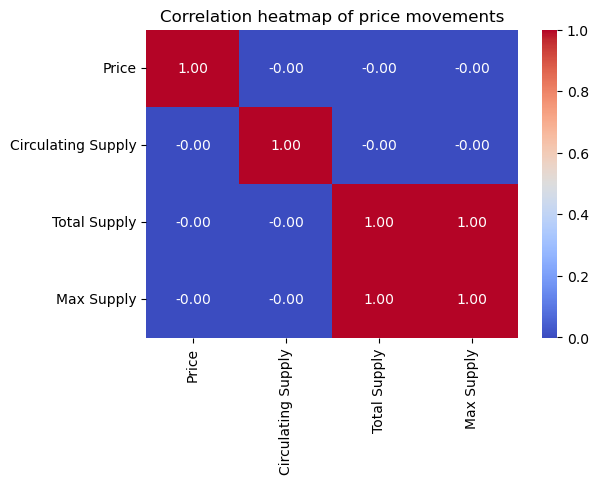

In [23]:
#correlation 
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap of price movements")
plt.show()

#### 2. Scatter plot

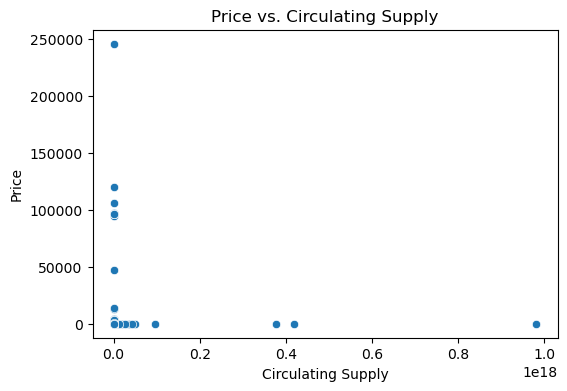

In [24]:
# Scatter plot: Price vs. Circulating Supply
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Circulating Supply', y='Price', data=df)
plt.title("Price vs. Circulating Supply")
plt.xlabel("Circulating Supply")
plt.ylabel("Price")
plt.show()

In [24]:
# exporting the data for visualisation in Power BI
df.to_excel('Crypto Trend 2024 Analysis.xlsx', index=False, engine='openpyxl')